In [13]:
import pandas as pd
import statsmodels.api as sm
import numpy as np

### Загружаем данные

In [14]:
item = 'OFP' # Выбрать из поля Item для вашего датасета
package = 'Ecdat' # Выбрать из поля Package для вашего датасета

df = sm.datasets.get_rdataset(item, package , cache=True).data
df.head()

,ofp,ofnp,opp,opnp,emr,hosp,numchron,adldiff,age,black,sex,maried,school,faminc,employed,privins,medicaid,region,hlth
0,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.8810,yes,yes,no,other,other
1,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
2,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
3,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
4,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other


### себе для справки:
ofp
number of physician office visits

ofnp
number of nonphysician office visits

opp
number of physician outpatient visits

opnp
number of nonphysician outpatient visits

emr
number of emergency room visits

hosp
number of hospitalizations

numchron
number of chronic conditions

adldiff
the person has a condition that limits activities of daily living ?

age
age in years (divided by 10)

black
is the person African–American ?

sex
is the person male ?

maried
is the person married ?

school
number of years of education

faminc
family income in 10000$

employed
is the person employed ?

privins
is the person covered by private health insurance?

medicaid
is the person covered by medicaid ?

region
the region (noreast, midwest, west)

hlth
self-perceived health (excellent, poor, other)

### Далее идет ваше решение

Задание

1) Изучите внимательно ваш датасет и смысл переменных, которые в нем содержатся

2) Сформулируйте на базе переменных три вида гипотез:
    а) Выберите две категориальные переменные и сформулируйте гипотезу об их взаимосвязи
    б) Выберите одну категориальную и одну числовую переменную и сформулируйте гипотезу об их взаимосвязи
    в) Выберите две числовые переменные и сформулируйте гипотезу об их взаимосвязи
    
3) Для каждой гипотезы постарайтесь привести логический смысл, почему вы считаете, что эта взаимосвязь должна существовать и какую форму взаимосвязи вы ожидаете. Что это дает с практической точки зрения?

4) Для выбранных переменных проведите разведочный анализ данных. Приведите наиболее подходящие описательные статистики, частотные распределения, постройте графики, которые бы давали представление как о переменных по отдельности, так и об их взаимосвязи

5) Проведите очистку данных от пропусков, выбросов и некорректных значений любым выбранным способом. Постарайтесь обосновать этот способ.

6) Протестируйте распределение числовой переменной на соответствие нормальному. Постройте QQ-plot и гистограмму.

7) Проведите тесты гипотез из пункта (2) и сделайте выводы. Какой практический смысл имеют результаты проведенных тестов? Как их можно использовать?

8) Результат сохранить на GitHub и отправить в виде ссылки на файл + блокнота в формате ipynb

Помните, что просто посчитать - это половина задания. К каждому шагу нужны пояснения и описания. Старайтесь структурировать ваш код, чтобы он был понятен стороннуму пользователю!

# Решение:

# Гипотезы:

### 1. (две категориальные переменные): неработающие люди реже покупают частные страховки чем работающие (privins, employed)

### 2. (одна категориальная и одна числовая переменная): мужчины реже ходят к врачу (sex, ofp)

### 3. (две числовые переменные): чем старше человек тем чаще он обращается к врачу (ofp, age)

In [38]:
df.shape

(4406, 19)

In [40]:
cdf = df.dropna().copy()

In [42]:
cdf.shape

(4406, 19)

#### Ничего не дропнулось - значит NA нет

### Проверка 1й гипотезы

In [28]:
df.pivot_table(
        values = 'privins',
        #index = 'maried',
        columns = 'employed',
        aggfunc = 'count'
)

employed,no,yes
privins,3951,455


### Интересно: получается что нет данных для подтверждения нулевой гипотезы. Причем с очень существенным перевесом у "незанятых" людей больше частных страховок. Проверял - в группах женатых/неженатых все аналогично.

### Проверка 2й гипотезы:

In [63]:
df.pivot_table(
        values = 'ofp',
        columns = 'sex',
        aggfunc = 'sum'
)

sex,female,male
ofp,15805,9637


Гипотеза подтвердилась/ Почти в два раза мужчины реже обращаются к врачу. На всякий случай проверю на предмет женат/неженат. Моежт быть влияние партнера в браке.

In [71]:
df.pivot_table(
        values = 'ofp',
        index = 'maried',
        columns = 'sex',
        aggfunc = 'sum'
)

sex,female,male
maried,,
no,10087,1776
yes,5718,7861


Вот это поворот - женатые мужчины чаще неженатых образаются к варчу, более того - чаще замужних женщин!

Получается статистику всем мужчинам "портят" неженатые) так появляются стереотипы что мужчины не ходят к варчу.

### Проверка 3й гипотезы:

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

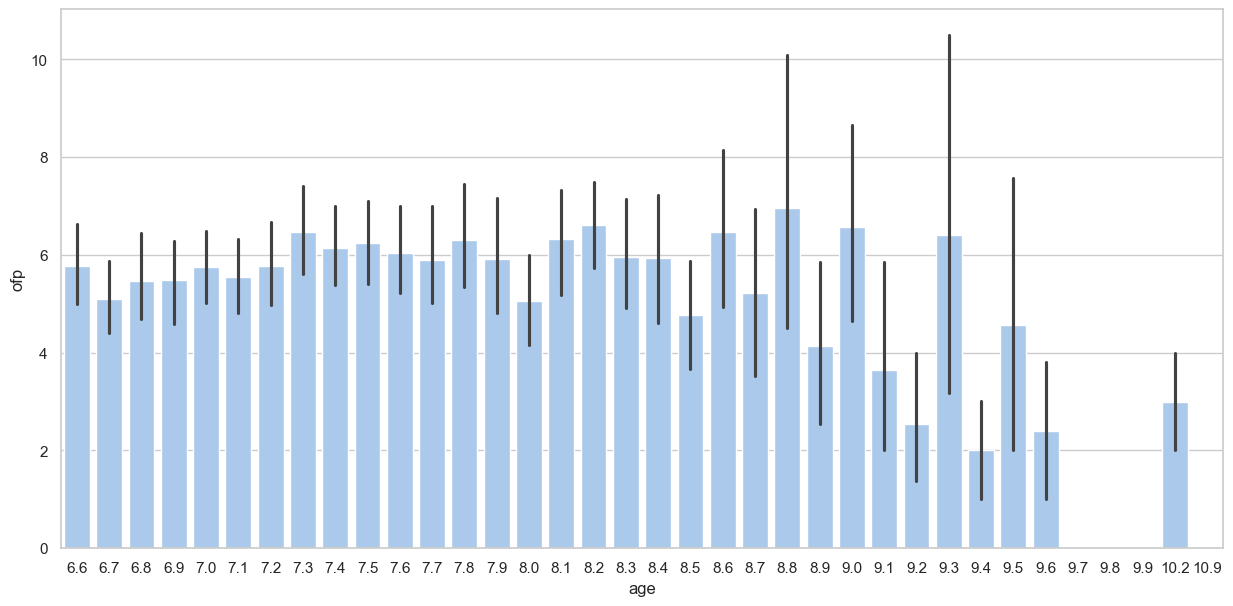

In [103]:
sns.set_theme(style="whitegrid", palette="pastel")
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'age', y = 'ofp')
plt.show() 

#### Данные не позволяют утверждать что 3я гипотеза верна. Надо конечно учитывать что наблюдения имеются с 66 лет. Обращает на себя внимание "эффект зубьев пилы" после 85 лет. Возможно связано с обязательными/необязательными чекапами в США после данного возраста. Либо с бесплатными/платными. В любом случае после 85 лет имеется "зубчатая" тенденция к снижению количества визитов к терапефту (очевидно вляиет средняя продолжительность жизни людей). Ну и 3 обращения в возрасте 102 года выбросом не считаю. Просто очевидено долгожитель ходил к варчу.

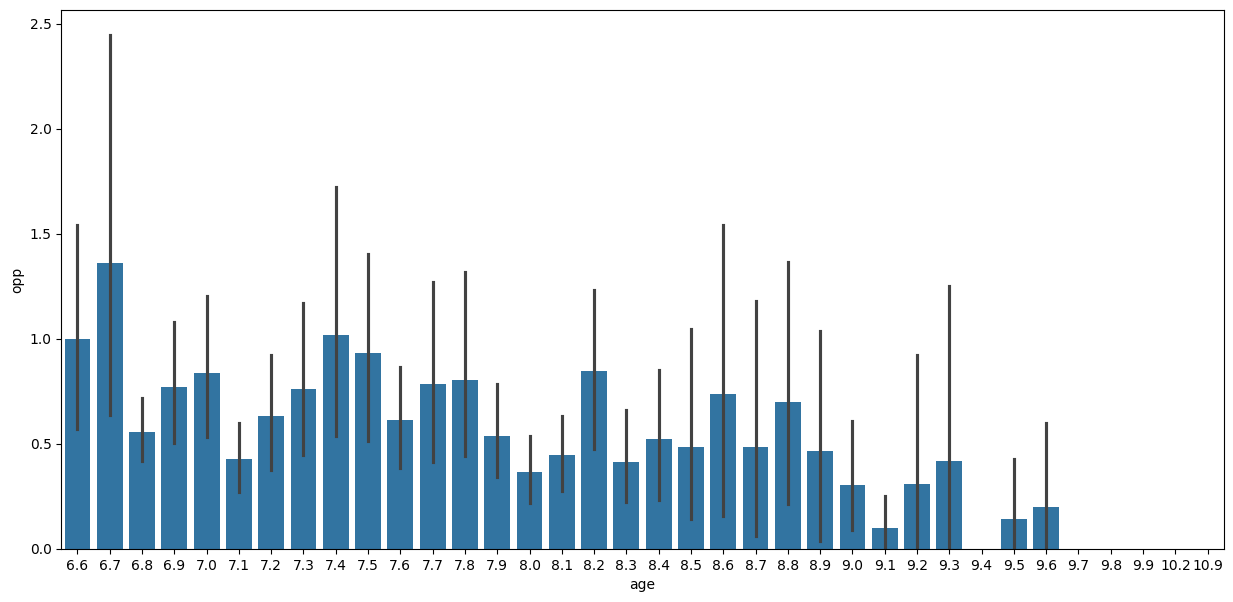

In [21]:
plt.figure(figsize = (15, 7))
sns.barplot(data = df, x = 'age', y = 'opp')
plt.show() 

### На всякий случай проверил амбулаторный прием. Ничего нового не нашел, кроме того, что 102-летний пациент амбулаторно не обращался.